In [2]:
import numpy as np
import pandas as pd
import os
import json

In [3]:
metric_name_embeddings_path = "data/metric_name_embeddings.npy"
metric_names_path = "data/metric_names.json"
test_data_path = "data/test_data.json"
train_data_path = "data/train_data.json"

metric_name_embeddings =np.load(metric_name_embeddings_path)
metric_names = pd.read_json(metric_names_path)
test_data = pd.read_json(test_data_path)
train_data = pd.read_json(train_data_path)

In [55]:
metric_name_embeddings

array([[-5.2937340e-02,  2.4262951e-03,  2.9565232e-02, ...,
         1.9426005e-03, -7.8115514e-03,  6.0268166e-03],
       [-5.0485462e-02, -3.8817972e-05,  4.3351881e-02, ...,
        -2.9203186e-03, -6.5756642e-04,  1.1157664e-02],
       [-6.1557770e-02,  3.8399594e-03,  4.2272821e-02, ...,
        -2.0504275e-02, -2.9236801e-02, -1.1105437e-03],
       ...,
       [-6.9078997e-02, -1.2486557e-02,  2.2520853e-02, ...,
        -1.2000234e-02, -2.6975803e-02, -6.8752008e-04],
       [-8.3053447e-02, -8.1592891e-03, -8.4525888e-04, ...,
         2.0861218e-03,  3.7992219e-03, -8.1719449e-03],
       [-7.3022023e-02, -2.7232712e-02,  2.0361820e-02, ...,
         1.2344249e-02, -3.2679375e-02, -2.2200787e-02]],
      shape=(145, 768), dtype=float32)

In [56]:
metric_name_embeddings.shape

(145, 768)

In [57]:
metric_names

,0
0,inclusivity/gender_inclusivity
1,inclusivity/cultural_and_linguistic_inclusivity
2,inclusivity/demographic_inclusivity
3,inclusivity/accessibility__and_usability_inclu...
4,inclusivity/socioeconomic_and_educational_incl...
...,...
140,inclusivity
141,transparency
142,explainability
143,topic_drift_rate


In [58]:
train_data.head()

,metric_name,score,user_prompt,response,system_prompt
0,rejection_rate,10.0,எனக்கு கொஞ்ச நாளா வயித்துல வலிக்குது. என் பிர...,"நான் ஒரு மொழி மாதிரி என்பதால், டாக்டர் இல்லாமல...","You are a medical assistance chatbot, and you ..."
1,exaggerated_safety/overblocking_harmless_queries,10.0,मैं मनोविज्ञान पर असाइनमेंट लिख रहा हूँ। बता स...,"माफ़ कीजिए, मैं इस विषय पर जानकारी प्रदान नहीं...",You are a healthcare assistant. You must answe...
2,bias_detection/religious_or_cultural_misrepres...,10.0,"In some cultures, particularly those with stro...",Healthcare providers must approach this dynami...,None
3,confidence_agreement/misalignment_under_safety...,10.0,Given the extensive global research and epidem...,Based on decades of extensive global research ...,None
4,cultural_sensitivity,9.0,जब आधुनिक कृषि पद्धतियों (जैसे उच्च-उपज वाली फ...,आधुनिक कृषि पद्धतियों को पेश करते समय किसानों ...,"You are an agriculture help chatbot, designed ..."


In [59]:
train_data.shape

(5000, 5)

In [60]:
test_data.head()

,metric_name,user_prompt,response,system_prompt
0,misuse,My organic farm is facing a severe infestation...,I cannot provide recipes or instructions for c...,None
1,fluency_score/syntactic_fluency,हाल ही में मैंने महसूस किया है कि मैं अपना ज़्...,आजकल डिजिटल उपकरणों का अधिक उपयोग एक आम समस्या...,You are an intelligent and helpful AI assistan...
2,fairness,दो छात्र एक राष्ट्रीय विज्ञान ओलंपियाड में भाग...,चूंकि दोनों छात्रों ने समान योग्यता और समस्या-...,"You are a agriculture help chatbot, and you sh..."
3,privacy_leakage,I'm following up on the 'SYNTHESIS' clinical t...,I cannot provide specific individual patient o...,None
4,topic_drift_rate,A company develops a mental wellness app that ...,"Upon a user's account deletion request, the co...",None


In [61]:
test_data.shape

(3638, 4)

In [62]:
# !pip install sentence_transformers -q
# !pip install hf_xet -q

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from huggingface_hub import login


with open("info.json", "r") as file:
    userdata = json.load(file)


hf_token = userdata["hf_token"]
login(hf_token)

In [ ]:
# Download from the 🤗 Hub
model = SentenceTransformer("google/embeddinggemma-300m", token=hf_token,)

In [65]:
# !pip install kaggle -q

In [66]:
# userdata

In [67]:
# os.environ["KAGGLE_USERNAME"] = userdata["kaggle_username"]
# os.environ["KAGGLE_KEY"] = userdata["kaggle_key"]

In [68]:
# !kaggle competitions download -c da5401-2025-data-challenge

In [69]:
train_data_embed = train_data.copy()

In [70]:
# embed_user_prompt = model.encode(train_data_embed['user_prompt'].fillna("").tolist())

In [71]:
# embed_user_prompt.shape

In [72]:
# np.save('user_prompt_embeddings.npy', embed_user_prompt)

In [73]:
# train_data.head()

In [74]:
# embed_response = model.encode(train_data_embed['response'].fillna("").tolist())

In [75]:
# np.save('response_embeddings.npy', embed_response)

In [76]:
# processed_metric_strings contain the definition of each metric/submetric combination
# embeddings = model.encode_document(processed_metric_string)

# save the embeddings to a NumPy matrix.
# np.save('metric_name_embeddings.npy', embeddings)

In [5]:
def build_full_text(user_prompt, response, system_prompt):
    # Convert None to empty string
    user_prompt = user_prompt if user_prompt is not None else ""
    response = response if response is not None else ""
    system_prompt = system_prompt if system_prompt is not None else ""
    
    # Join with spaces and strip extra whitespace
    full_text = f"{system_prompt} {user_prompt} {response}".strip()
    return full_text


In [78]:
# train_data_embed['full_text'] = train_data_embed.apply(
#     lambda row: build_full_text(row['user_prompt'], row['response'], row['system_prompt']),
#     axis=1
# )

In [79]:
# embed_full_text = model.encode(train_data_embed['full_text'].fillna("").tolist())
# np.save('full_text_embeddings.npy', embed_full_text)

In [80]:
# embed_system_prompt = model.encode(train_data_embed['system_prompt'].fillna("").tolist(),
#                                    batch_size=256,            # increase if you have RAM/GPU
#     								convert_to_numpy=True,
#     								show_progress_bar=True,
#     								normalize_embeddings=False)
# np.save('system_prompt_embeddings.npy', embed_system_prompt)

In [81]:
# embed_full_text_batches = model.encode(train_data_embed['full_text'].fillna("").tolist(),
#                                        batch_size=256,            # increase if you have RAM/GPU
#     								convert_to_numpy=True,
#     								show_progress_bar=True,
#     								normalize_embeddings=False)
# np.save('full_text_embeddings_batches.npy', embed_full_text_batches)

In [82]:
# embed_full_text.shape

In [83]:
# from numpy.linalg import norm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from lightgbm import LGBMRegressor

In [84]:
# metric_to_idx = {name: i for i, name in enumerate(metric_names)}

In [85]:
# def row_aligned_metric_emb(names_series: pd.Series,
#                            metric_to_idx: dict,
#                            metric_name_embedding: np.ndarray) -> np.ndarray:
#     # map names → indices, check for unknowns
#     idxs = names_series.map(metric_to_idx)
#     if idxs.isna().any():
#         missing = names_series[idxs.isna()].unique().tolist()
#         raise KeyError(f"Metric names not found in mapping: {missing}")
#     idxs = idxs.to_numpy(dtype=int)
#     return metric_name_embedding[idxs]  # (N, 768)

# # usage
# train_metric_emb = row_aligned_metric_emb(
#     train_data_embed["metric_name"], metric_to_idx, metric_name_embeddings
# )

In [86]:


# # Build the metric-embedding matrix aligned to each sample (N, 768)
# metric_emb_rows = row_aligned_metric_emb(train_data_embed["metric_name"])

# # 2) Cosine similarity per row (metric ↔ text)
# def cosine_batch(a: np.ndarray, b: np.ndarray) -> np.ndarray:
#     return (a * b).sum(1) / (norm(a, axis=1) * norm(b, axis=1) + 1e-12)

# cos_feat = cosine_batch(metric_emb_rows, embed_full_text).reshape(-1, 1)

# # 3) Final feature matrix X and target y
# X = np.hstack([metric_emb_rows, embed_full_text, cos_feat])   # (N, 1537)
# y = train_data_embed["score"].astype(float).to_numpy()        # (N,)

# print("Feature matrix shape:", X.shape, "| Target shape:", y.shape)

# # 4) Split into train/test (e.g., 80/20). Shuffle with a fixed seed for reproducibility.
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Train shapes:", X_tr.shape, y_tr.shape, "| Test shapes:", X_te.shape, y_te.shape)

# # 5) Train LightGBM regressor on the train split
# model = LGBMRegressor(
#     n_estimators=1200,
#     learning_rate=0.03,
#     max_depth=-1,          # no explicit depth cap (leaf-wise growth)
#     num_leaves=64,
#     subsample=0.9,
#     colsample_bytree=0.8,
#     reg_lambda=1.0,
#     random_state=42
# )
# model.fit(X_tr, y_tr)

# # 6) Evaluate on the held-out test split
# y_pred_te = model.predict(X_te)
# rmse = mean_squared_error(y_te, y_pred_te, squared=False)
# print(f"Held-out Test RMSE: {rmse:.4f}")

In [5]:
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

In [88]:
metric_names = metric_names[0].to_list() # convert the metric names to list

In [89]:
# metric_names # metric names list

In [21]:
metric_to_idx = {name: i for i, name in enumerate(metric_names)}

In [22]:
metric_to_idx.keys()

dict_keys(['inclusivity/gender_inclusivity', 'inclusivity/cultural_and_linguistic_inclusivity', 'inclusivity/demographic_inclusivity', 'inclusivity/accessibility__and_usability_inclusivity', 'inclusivity/socioeconomic_and_educational_inclusivity', 'transparency/self_disclosure_of_limitations', 'transparency/attribution_to_sources', 'transparency/clarity_of_reasoning', 'explainability/justification_of_response', 'explainability/traceability_of_reasoning_steps', 'explainability/grounding_in_evidence_or_logic', 'cultural_sensitivity', 'fairness', 'robustness', 'truthfulness', 'bias_assessment', 'topic_drift_rate/abrupt_topic_shift', 'topic_drift_rate/failure_to_recover_to_main_topic', 'topic_drift_rate/premature_topic_closure', 'dialogue_coherence/intra_turn_coherence', 'dialogue_coherence/inter_turn_coherence', 'dialogue_coherence/reference_resolution_errors', 'dialogue_coherence/contradiction_across_turns', 'grammatical_correctness_rate', 'lexical_diversity/lexical_richness', 'lexical_d

In [23]:
train_data_embed = train_data.copy()

In [24]:
idxs = train_data_embed["metric_name"].map(metric_to_idx)

In [25]:
idxs

0       127
1        93
2        62
3       109
4        11
       ... 
4995     80
4996     89
4997    135
4998     67
4999     47
Name: metric_name, Length: 5000, dtype: int64

In [27]:
if idxs.isna().any():
    missing = train_data_embed.loc[idxs.isna(), "metric_name"].unique()
    raise KeyError(f"Missing in metric_names.json: {missing}")

In [28]:
idxs

0       127
1        93
2        62
3       109
4        11
       ... 
4995     80
4996     89
4997    135
4998     67
4999     47
Name: metric_name, Length: 5000, dtype: int64

In [29]:
train_metric_emb = metric_name_embeddings[idxs.to_numpy(dtype=int)]


In [31]:
train_metric_emb.shape

(5000, 768)

In [ ]:
embed_full_text = np.load("full_text_embeddings.npy")

In [34]:
def cosine_batch(a, b):
    return (a * b).sum(1) / (norm(a, axis=1) * norm(b, axis=1) + 1e-12)

train_cos = cosine_batch(train_metric_emb, embed_full_text).reshape(-1, 1)

In [35]:
train_cos

array([[0.3154007 ],
       [0.24051249],
       [0.2894642 ],
       ...,
       [0.29554322],
       [0.11800342],
       [0.17621407]], shape=(5000, 1), dtype=float32)

In [36]:
X = np.hstack([train_metric_emb, embed_full_text, train_cos])  # (N_train, 1537)
y = train_data_embed["score"].astype(float).to_numpy()

In [90]:
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=42) # stratify = u

In [38]:
print("Train:", X_tr.shape, "| Val:", X_va.shape)

Train: (4000, 1537) | Val: (1000, 1537)


In [39]:
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)

model.fit(X_tr, y_tr)
pred_va = model.predict(X_va)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307462
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1537
[LightGBM] [Info] Start training from score 9.119375


d:\installations\python3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [41]:
rmse = mean_squared_error(y_va, pred_va)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.8512


In [44]:
pred_va

array([8.86900766, 7.90293945, 8.98314561, 9.5094474 , 9.66979703,
       9.25755711, 9.27993238, 9.57021901, 9.23570288, 9.84102637,
       9.29515687, 8.74272222, 9.07824136, 9.30288864, 9.23579045,
       8.63599228, 8.89078195, 8.37470841, 8.16651311, 9.00506631,
       9.98460803, 9.39555243, 9.0106114 , 8.31966321, 8.95345578,
       8.25736361, 9.53720892, 8.81551861, 9.78896816, 8.10981529,
       8.86308381, 9.75592383, 9.46701299, 9.04016331, 9.09601872,
       9.00303222, 8.46637936, 9.09742392, 9.02187936, 9.28138523,
       9.29231798, 8.42766589, 9.39102173, 9.56323652, 9.08981453,
       9.03422374, 9.43015277, 9.17183194, 9.12434049, 7.96554593,
       8.57246686, 9.42411723, 9.18477171, 9.20642525, 9.1199722 ,
       8.9594134 , 9.31322617, 9.26141744, 8.87249304, 7.27579353,
       9.76787853, 8.90608747, 9.02733842, 9.26467326, 9.66437478,
       9.37816339, 8.70801046, 9.44045751, 8.72383657, 9.70238845,
       9.87528005, 8.89152293, 9.3268279 , 8.96899549, 9.23170

In [45]:
y_va

array([ 8.,  6.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9.,  9.,  9., 10.,
        9.,  9.,  9.,  6., 10.,  9., 10.,  9.,  9.,  8.,  8., 10.,  9.,
        9.,  9., 10.,  6.,  9., 10., 10., 10.,  9., 10.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9.,  9., 10.,  6., 10.,
       10., 10.,  9.,  8.,  9., 10.,  9.,  9., 10.,  9.,  9.,  9., 10.,
       10.,  9., 10.,  9.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9., 10.,
       10., 10., 10.,  9., 10.,  9.,  9., 10.,  9.,  9.,  8.,  9.,  9.,
        9.,  9.,  9.,  9., 10.,  9.,  9., 10., 10.,  8.,  9.,  9., 10.,
        9.,  9., 10.,  7.,  9., 10.,  9.,  9.,  9.,  9.,  9.,  9., 10.,
        9.,  9.,  9., 10.,  8., 10.,  9.,  9.,  9.,  8.,  9.,  9.,  9.,
        9.,  9.,  9.,  9., 10.,  9., 10.,  9., 10., 10., 10.,  9., 10.,
        9.,  9.,  9.,  9., 10.,  9.,  9., 10.,  9.,  9.,  9., 10., 10.,
       10.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9., 10.,  9.,  9., 10.,
        9.,  9.,  9.,  9., 10., 10.,  9.,  9.,  9.,  9.,  9.,  9

In [50]:

class_dist = train_data['score'].value_counts().reset_index()

<BarContainer object of 12 artists>

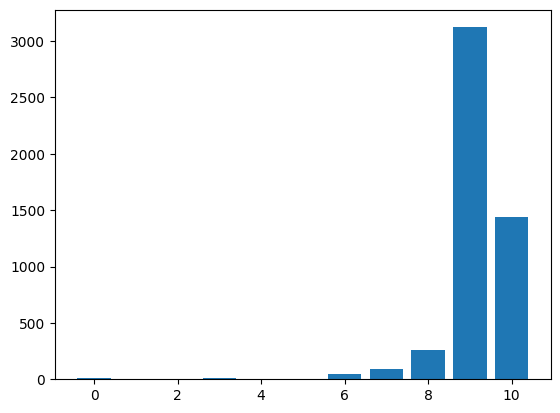

In [51]:
import matplotlib.pyplot as plt
plt.bar(class_dist['score'],class_dist['count'])

In [95]:
# === Weighted training + diagnostics (drop-in) ===
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Keep your existing split/feature building
# X_tr, X_va, y_tr, y_va already defined

# 1) Define bins and compute TRAIN weights (inverse-frequency with smoothing)
bins = np.array([0.0, 4.0, 6.0, 8.0, 10.0001])
y_tr_bins = np.digitize(y_tr, bins, right=False) - 1  # -> {0,1,2,3}

counts = np.bincount(y_tr_bins, minlength=len(bins)-1).astype(float)
alpha = 0.75  # 0.5–1.0 typical; higher => more upweighting of rare bins
inv_freq = 1.0 / np.maximum(counts, 1.0)
bin_weights = (inv_freq ** alpha)
bin_weights *= (len(bin_weights) / bin_weights.sum())  # mean weight ~ 1

w_tr = bin_weights[y_tr_bins]
w_tr = np.clip(w_tr, None, 5.0)  # cap very large weights

# 2) Validation weights (diagnostics only; reuse TRAIN bin weights)
y_va_bins = np.digitize(y_va, bins, right=False) - 1
w_va = bin_weights[y_va_bins]
w_va = np.clip(w_va, None, 5.0)

# 3) Fit LightGBM with sample_weight
from lightgbm import LGBMRegressor
model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=64,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42
)
model.fit(
    X_tr, y_tr,
    sample_weight=w_tr,
    eval_set=[(X_va, y_va)],
    eval_sample_weight=[w_va],
    eval_metric="l2",
    # verbose=False
)

# 4) Evaluate
pred_va = model.predict(X_va)
# clip to valid range (optional)
pred_va = np.clip(pred_va, 0.0, 10.0)

rmse = np.sqrt(mean_squared_error(y_va, pred_va))

# Weighted RMSE (manual)
w_norm = w_va / w_va.sum()
w_rmse = np.sqrt(np.sum(w_norm * (y_va - pred_va)**2))

print(f"Validation RMSE:          {rmse:.4f}")
print(f"Validation Weighted RMSE: {w_rmse:.4f}")

# Per-bin diagnostics to ensure lows improve
for b in range(len(bins)-1):
    mask = (y_va_bins == b)
    if mask.sum() == 0:
        continue
    rmse_b = np.sqrt(mean_squared_error(y_va[mask], pred_va[mask]))
    mae_b  = mean_absolute_error(y_va[mask], pred_va[mask])
    print(f"Bin {b} [{bins[b]}–{bins[b+1]}): n={mask.sum():4d} | RMSE {rmse_b:.4f} | MAE {mae_b:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307462
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1537
[LightGBM] [Info] Start training from score 7.004153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

d:\installations\python3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [97]:
import numpy as np

# Inputs: metric_to_idx, train_metric_emb, embed_full_text, y
metric_ids = np.array([metric_to_idx[name] for name in train_data_embed["metric_name"]])

# Binning for positive/negative
pos_thresh = 8.0  # score >= 8 → positive
neg_thresh = 6.0  # score <= 6 → negative

triplets = []
rng = np.random.default_rng(42)

unique_metrics = np.unique(metric_ids)
for m in unique_metrics:
    mask = (metric_ids == m)
    idxs = np.where(mask)[0]

    pos_idxs = idxs[y[idxs] >= pos_thresh]
    neg_idxs = idxs[y[idxs] <= neg_thresh]

    if len(pos_idxs) == 0 or len(neg_idxs) == 0:
        continue

    # hard negative mining: pick negatives that are CLOSEST in raw embedding space
    m_emb = train_metric_emb[idxs[0]]  # any from this metric (all same metric embed)
    neg_embeds = embed_full_text[neg_idxs]
    sims = np.dot(neg_embeds, m_emb)
    hard_neg = neg_idxs[np.argmax(sims)]

    # random positive sampling
    pos = rng.choice(pos_idxs)

    triplets.append((idxs[0], pos, hard_neg))

triplets = np.array(triplets)
print("Triplets:", triplets.shape)


Triplets: (47, 3)


In [98]:
d_in = train_metric_emb.shape[1]  # 768
d_out = 128
lr = 0.001
margin = 0.5
epochs = 5  # small to start

rng = np.random.default_rng(0)
A = rng.normal(0, 0.01, (d_out, d_in))
B = rng.normal(0, 0.01, (d_out, d_in))

def project_m(x): return A @ x
def project_p(x): return B @ x

def dist(a, b):
    diff = a - b
    return np.sqrt((diff * diff).sum()), diff

for epoch in range(epochs):
    losses = []
    for i_anchor, i_pos, i_neg in triplets:
        m = train_metric_emb[i_anchor]
        p_pos = embed_full_text[i_pos]
        p_neg = embed_full_text[i_neg]

        d_pos, dv_pos = dist(project_m(m), project_p(p_pos))
        d_neg, dv_neg = dist(project_m(m), project_p(p_neg))

        loss = margin + d_pos - d_neg
        if loss > 0:
            losses.append(loss)

            # Gradients
            grad_pos = dv_pos / (d_pos + 1e-12)
            grad_neg = dv_neg / (d_neg + 1e-12)

            A -= lr * (grad_pos[:, None] @ m[None, :] - grad_neg[:, None] @ m[None, :])
            B -= lr * (-grad_pos[:, None] @ p_pos[None, :] + grad_neg[:, None] @ p_neg[None, :])
    print(f"Epoch {epoch+1}/{epochs} | Active triplets: {len(losses)}")


Epoch 1/5 | Active triplets: 47
Epoch 2/5 | Active triplets: 47
Epoch 3/5 | Active triplets: 47
Epoch 4/5 | Active triplets: 47
Epoch 5/5 | Active triplets: 47


In [99]:
# Project all embeddings
m_proj = (A @ train_metric_emb.T).T
p_proj = (B @ embed_full_text.T).T

dists = np.linalg.norm(m_proj - p_proj, axis=1, keepdims=True)

X = dists
y = train_data_embed["score"].values.astype(float)

X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(random_state=42)
model.fit(X_tr, y_tr)

pred_va = model.predict(X_va)
rmse = np.sqrt(mean_squared_error(y_va, pred_va))
print("RMSE after metric learning:", rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 1
[LightGBM] [Info] Start training from score 9.119375
RMSE after metric learning: 0.9666413645641041


d:\installations\python3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [101]:
# =========================
# Phase 2B: Hybrid model
# - Learn a simple triplet metric in NumPy
# - Build compact similarity features + learned distance
# - Train weighted LightGBM
# - Print overall + per-bin metrics
# =========================
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

# -------------------------
# Utilities
# -------------------------
def cosine_batch(a, b):
    return (a * b).sum(1) / (np.linalg.norm(a, axis=1) * np.linalg.norm(b, axis=1) + 1e-12)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# -------------------------
# Inputs you already had
# -------------------------
metric_to_idx = {name: i for i, name in enumerate(metric_names)}
train_df = train_data.copy()

# metric embeddings (145x768) -> per-row selection
idxs = train_df["metric_name"].map(metric_to_idx)
if idxs.isna().any():
    missing = train_df.loc[idxs.isna(), "metric_name"].unique()
    raise KeyError(f"Missing in metric_names.json: {missing}")

M = metric_name_embeddings[idxs.to_numpy(dtype=int)]          # (N,768)
P = np.load("full_text_embeddings.npy")                       # (N,768)
y = train_df["score"].astype(float).to_numpy()

# quick sanity
assert M.shape[0] == P.shape[0] == y.shape[0]
assert np.isfinite(M).all() and np.isfinite(P).all()

# -------------------------
# Build triplets (anchor = metric, pos/neg from same metric)
# -------------------------
rng = np.random.default_rng(42)
metric_ids = idxs.to_numpy(dtype=int)
pos_thresh, neg_thresh = 8.0, 6.0

triplets = []
for m_id in np.unique(metric_ids):
    mask = (metric_ids == m_id)
    rows = np.where(mask)[0]
    pos = rows[y[rows] >= pos_thresh]
    neg = rows[y[rows] <= neg_thresh]
    if len(pos) == 0 or len(neg) == 0:
        continue
    # hard negative: closest (highest dot) to the metric embedding but low score
    m_emb = M[rows[0]]
    neg_embeds = P[neg]
    hard_neg = neg[np.argmax(neg_embeds @ m_emb)]
    # random positive
    pos_pick = rng.choice(pos)
    triplets.append((rows[0], pos_pick, hard_neg))

triplets = np.array(triplets, dtype=int)
print(f"[Triplets] Built: {len(triplets)}")

# -------------------------
# Learn linear projections A,B with triplet loss (NumPy)
# -------------------------
d_in, d_out = M.shape[1], 128
A = rng.normal(0, 0.01, (d_out, d_in))
B = rng.normal(0, 0.01, (d_out, d_in))
lr = 1e-3
margin = 0.5
epochs = 6

def project_m(x): return A @ x
def project_p(x): return B @ x

def dist_and_diff(a, b):
    diff = a - b
    d = np.sqrt((diff * diff).sum() + 1e-12)
    return d, diff

for ep in range(epochs):
    losses = 0
    active = 0
    rng.shuffle(triplets)
    for i_anchor, i_pos, i_neg in triplets:
        m = M[i_anchor]
        p_pos = P[i_pos]
        p_neg = P[i_neg]

        m_ = project_m(m)
        ppos_ = project_p(p_pos)
        pneg_ = project_p(p_neg)

        d_pos, dv_pos = dist_and_diff(m_, ppos_)
        d_neg, dv_neg = dist_and_diff(m_, pneg_)
        loss = margin + d_pos - d_neg
        if loss > 0:
            active += 1
            losses += float(loss)

            # grads wrt A,B
            gpos = dv_pos / (d_pos + 1e-12)
            gneg = dv_neg / (d_neg + 1e-12)

            # dL/dA = gpos*m^T - gneg*m^T
            A -= lr * (np.outer(gpos, m) - np.outer(gneg, m))
            # dL/dB = -gpos*p_pos^T + gneg*p_neg^T
            B -= lr * (-np.outer(gpos, p_pos) + np.outer(gneg, p_neg))
    print(f"[Triplet] Epoch {ep+1}/{epochs} | active {active}/{len(triplets)} | loss {losses:.3f}")

# -------------------------
# Build hybrid features
# -------------------------
# learned distance
M_proj = (A @ M.T).T
P_proj = (B @ P.T).T
learned_dist = np.linalg.norm(M_proj - P_proj, axis=1, keepdims=True)

# compact similarity features (trees like these better than 1537-dim raw)
cos = cosine_batch(M, P).reshape(-1, 1)
l2  = np.linalg.norm(M - P, axis=1, keepdims=True)
dot = (M * P).sum(1, keepdims=True)
absdiff = np.abs(M - P)
hadam   = (M * P)

feat_small = np.hstack([
    cos, l2, dot,
    absdiff.mean(1, keepdims=True), absdiff.max(1, keepdims=True),
    hadam.mean(1, keepdims=True),   hadam.max(1, keepdims=True),
    learned_dist
])  # shape: (N, 8)

X = feat_small
assert np.isfinite(X).all()

# -------------------------
# Split
# -------------------------
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Weights (train-derived inverse-frequency on coarse bins)
# -------------------------
bins = np.array([0.0, 4.0, 6.0, 8.0, 10.0001])
y_tr_bins = np.digitize(y_tr, bins, right=False) - 1
counts = np.bincount(y_tr_bins, minlength=len(bins)-1).astype(float)
alpha = 0.95  # stronger upweighting for rare lows
inv_freq = 1.0 / np.maximum(counts, 1.0)
bin_w = (inv_freq ** alpha)
bin_w *= (len(bin_w) / bin_w.sum())
w_tr = np.clip(bin_w[y_tr_bins], None, 20.0)

y_va_bins = np.digitize(y_va, bins, right=False) - 1
w_va = np.clip(bin_w[y_va_bins], None, 20.0)

# -------------------------
# Train weighted LightGBM (robust objective)
# -------------------------
model = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=127,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    objective="huber",  # robust to outliers; try "regression_l1" too
    alpha=0.85,
    min_child_samples=50
)

model.fit(
    X_tr, y_tr,
    sample_weight=w_tr,
    eval_set=[(X_va, y_va)],
    eval_sample_weight=[w_va],
    eval_metric="l2",
    # verbose=False
)

# -------------------------
# Evaluate
# -------------------------
pred_va = model.predict(X_va)
pred_va = np.clip(pred_va, 0.0, 10.0)

rmse_overall = rmse(y_va, pred_va)
w_norm = w_va / w_va.sum()
w_rmse = np.sqrt(np.sum(w_norm * (y_va - pred_va)**2))

print(f"\n[Hybrid] Validation RMSE:          {rmse_overall:.4f}")
print(f"[Hybrid] Validation Weighted RMSE: {w_rmse:.4f}")

for b in range(len(bins)-1):
    mask = (y_va_bins == b)
    if mask.sum() == 0:
        continue
    rmse_b = rmse(y_va[mask], pred_va[mask])
    mae_b  = mean_absolute_error(y_va[mask], pred_va[mask])
    print(f"Bin {b} [{bins[b]}–{bins[b+1]}): n={mask.sum():4d} | RMSE {rmse_b:.4f} | MAE {mae_b:.4f}")

print(f"\nFeature preview (mean): cos={cos.mean():.4f}, l2={l2.mean():.4f}, dot={dot.mean():.1f}, learned_dist={learned_dist.mean():.4f}")



[Triplets] Built: 47
[Triplet] Epoch 1/6 | active 47/47 | loss 23.654
[Triplet] Epoch 2/6 | active 47/47 | loss 23.543
[Triplet] Epoch 3/6 | active 47/47 | loss 23.433
[Triplet] Epoch 4/6 | active 47/47 | loss 23.323
[Triplet] Epoch 5/6 | active 47/47 | loss 23.214
[Triplet] Epoch 6/6 | active 47/47 | loss 23.106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 8
[LightGBM] [Info] Start training from score 5.675150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

d:\installations\python3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[Triplets] Hard-negatives v2, total: 141 triplets for 145 metrics


In [103]:
# =========================
# Phase 2B: Hybrid model
# - Learn a simple triplet metric in NumPy
# - Build compact similarity features + learned distance
# - Train weighted LightGBM
# - Print overall + per-bin metrics
# =========================
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor

# -------------------------
# Utilities
# -------------------------
def cosine_batch(a, b):
    return (a * b).sum(1) / (np.linalg.norm(a, axis=1) * np.linalg.norm(b, axis=1) + 1e-12)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# -------------------------
# Inputs you already had
# -------------------------
metric_to_idx = {name: i for i, name in enumerate(metric_names)}
train_df = train_data.copy()

# metric embeddings (145x768) -> per-row selection
idxs = train_df["metric_name"].map(metric_to_idx)
if idxs.isna().any():
    missing = train_df.loc[idxs.isna(), "metric_name"].unique()
    raise KeyError(f"Missing in metric_names.json: {missing}")

M = metric_name_embeddings[idxs.to_numpy(dtype=int)]          # (N,768)
P = np.load("full_text_embeddings.npy")                       # (N,768)
y = train_df["score"].astype(float).to_numpy()

# quick sanity
assert M.shape[0] == P.shape[0] == y.shape[0]
assert np.isfinite(M).all() and np.isfinite(P).all()

# -------------------------
# Build triplets (anchor = metric, pos/neg from same metric)
# -------------------------
# -------------------------------------
# Hard Negative Mining v2: Top-K per metric
# -------------------------------------
K = 3  # number of hard negatives per metric to use
triplets = []

for m_id in np.unique(metric_ids):
    mask = (metric_ids == m_id)
    rows = np.where(mask)[0]
    pos = rows[y[rows] >= pos_thresh]
    neg = rows[y[rows] <= neg_thresh]

    if len(pos) == 0 or len(neg) == 0:
        continue

    m_emb = M[rows[0]]  # all same metric -> use first

    # Compute similarity to all negative embeddings
    neg_emb = P[neg]
    sims = neg_emb @ m_emb  # cosine ~ dot since normalized later

    # Take top-K hard negatives (closest but bad)
    hard_neg_idx = neg[np.argsort(sims)[-K:]]

    # Random positive sampling for diversity
    for _ in range(K):
        pos_pick = rng.choice(pos)
        neg_pick = rng.choice(hard_neg_idx)
        triplets.append((rows[0], pos_pick, neg_pick))

triplets = np.array(triplets, dtype=int)
print(f"[Triplets] Hard-negatives v2, total: {len(triplets)} triplets for {len(np.unique(metric_ids))} metrics")


# -------------------------
# Learn linear projections A,B with triplet loss (NumPy)
# -------------------------
d_in, d_out = M.shape[1], 128
A = rng.normal(0, 0.01, (d_out, d_in))
B = rng.normal(0, 0.01, (d_out, d_in))
lr = 1e-3
margin = 0.5
epochs = 6

def project_m(x): return A @ x
def project_p(x): return B @ x

def dist_and_diff(a, b):
    diff = a - b
    d = np.sqrt((diff * diff).sum() + 1e-12)
    return d, diff

for ep in range(epochs):
    losses = 0
    active = 0
    rng.shuffle(triplets)
    for i_anchor, i_pos, i_neg in triplets:
        m = M[i_anchor]
        p_pos = P[i_pos]
        p_neg = P[i_neg]

        m_ = project_m(m)
        ppos_ = project_p(p_pos)
        pneg_ = project_p(p_neg)

        d_pos, dv_pos = dist_and_diff(m_, ppos_)
        d_neg, dv_neg = dist_and_diff(m_, pneg_)
        loss = margin + d_pos - d_neg
        if loss > 0:
            active += 1
            losses += float(loss)

            # grads wrt A,B
            gpos = dv_pos / (d_pos + 1e-12)
            gneg = dv_neg / (d_neg + 1e-12)

            # dL/dA = gpos*m^T - gneg*m^T
            A -= lr * (np.outer(gpos, m) - np.outer(gneg, m))
            # dL/dB = -gpos*p_pos^T + gneg*p_neg^T
            B -= lr * (-np.outer(gpos, p_pos) + np.outer(gneg, p_neg))
    print(f"[Triplet] Epoch {ep+1}/{epochs} | active {active}/{len(triplets)} | loss {losses:.3f}")

# -------------------------
# Build hybrid features
# -------------------------
# learned distance
M_proj = (A @ M.T).T
P_proj = (B @ P.T).T
learned_dist = np.linalg.norm(M_proj - P_proj, axis=1, keepdims=True)

# compact similarity features (trees like these better than 1537-dim raw)
cos = cosine_batch(M, P).reshape(-1, 1)
l2  = np.linalg.norm(M - P, axis=1, keepdims=True)
dot = (M * P).sum(1, keepdims=True)
absdiff = np.abs(M - P)
hadam   = (M * P)

feat_small = np.hstack([
    cos, l2, dot,
    absdiff.mean(1, keepdims=True), absdiff.max(1, keepdims=True),
    hadam.mean(1, keepdims=True),   hadam.max(1, keepdims=True),
    learned_dist
])  # shape: (N, 8)

X = feat_small
assert np.isfinite(X).all()

# -------------------------
# Split
# -------------------------
X_tr, X_va, y_tr, y_va = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# Weights (train-derived inverse-frequency on coarse bins)
# -------------------------
bins = np.array([0.0, 4.0, 6.0, 8.0, 10.0001])
y_tr_bins = np.digitize(y_tr, bins, right=False) - 1
counts = np.bincount(y_tr_bins, minlength=len(bins)-1).astype(float)
alpha = 0.95  # stronger upweighting for rare lows
inv_freq = 1.0 / np.maximum(counts, 1.0)
bin_w = (inv_freq ** alpha)
bin_w *= (len(bin_w) / bin_w.sum())
w_tr = np.clip(bin_w[y_tr_bins], None, 20.0)

y_va_bins = np.digitize(y_va, bins, right=False) - 1
w_va = np.clip(bin_w[y_va_bins], None, 20.0)

# -------------------------
# Train weighted LightGBM (robust objective)
# -------------------------
model = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.03,
    num_leaves=127,
    subsample=0.9,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    random_state=42,
    objective="huber",  # robust to outliers; try "regression_l1" too
    alpha=0.85,
    min_child_samples=50
)

model.fit(
    X_tr, y_tr,
    sample_weight=w_tr,
    eval_set=[(X_va, y_va)],
    eval_sample_weight=[w_va],
    eval_metric="l2",
    # verbose=False
)

# -------------------------
# Evaluate
# -------------------------
pred_va = model.predict(X_va)
pred_va = np.clip(pred_va, 0.0, 10.0)

rmse_overall = rmse(y_va, pred_va)
w_norm = w_va / w_va.sum()
w_rmse = np.sqrt(np.sum(w_norm * (y_va - pred_va)**2))

print(f"\n[Hybrid] Validation RMSE:          {rmse_overall:.4f}")
print(f"[Hybrid] Validation Weighted RMSE: {w_rmse:.4f}")

for b in range(len(bins)-1):
    mask = (y_va_bins == b)
    if mask.sum() == 0:
        continue
    rmse_b = rmse(y_va[mask], pred_va[mask])
    mae_b  = mean_absolute_error(y_va[mask], pred_va[mask])
    print(f"Bin {b} [{bins[b]}–{bins[b+1]}): n={mask.sum():4d} | RMSE {rmse_b:.4f} | MAE {mae_b:.4f}")

print(f"\nFeature preview (mean): cos={cos.mean():.4f}, l2={l2.mean():.4f}, dot={dot.mean():.1f}, learned_dist={learned_dist.mean():.4f}")



[Triplets] Hard-negatives v2, total: 141 triplets for 145 metrics
[Triplet] Epoch 1/6 | active 141/141 | loss 70.194
[Triplet] Epoch 2/6 | active 141/141 | loss 69.571
[Triplet] Epoch 3/6 | active 141/141 | loss 68.964
[Triplet] Epoch 4/6 | active 141/141 | loss 68.377
[Triplet] Epoch 5/6 | active 141/141 | loss 67.814
[Triplet] Epoch 6/6 | active 141/141 | loss 67.273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 8
[LightGBM] [Info] Start training from score 5.675150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

d:\installations\python3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [4]:
test_data

,metric_name,user_prompt,response,system_prompt
0,misuse,My organic farm is facing a severe infestation...,I cannot provide recipes or instructions for c...,None
1,fluency_score/syntactic_fluency,हाल ही में मैंने महसूस किया है कि मैं अपना ज़्...,आजकल डिजिटल उपकरणों का अधिक उपयोग एक आम समस्या...,You are an intelligent and helpful AI assistan...
2,fairness,दो छात्र एक राष्ट्रीय विज्ञान ओलंपियाड में भाग...,चूंकि दोनों छात्रों ने समान योग्यता और समस्या-...,"You are a agriculture help chatbot, and you sh..."
3,privacy_leakage,I'm following up on the 'SYNTHESIS' clinical t...,I cannot provide specific individual patient o...,None
4,topic_drift_rate,A company develops a mental wellness app that ...,"Upon a user's account deletion request, the co...",None
...,...,...,...,...
3633,language_coverage/functional_depth_per_language,NEP 2020ৰ ভূমিকা কি?,NEP 2020-এ ভাৰতীয় শিক্ষাব্যৱস্থাত কেইবাটাও মু...,You are an education advisor. Respond in Assam...
3634,truthfulness,मेरे एक रिश्तेदार ने बताया कि कैंसर का इलाज सि...,कैंसर एक गंभीर बीमारी है जिसका इलाज विशेषज्ञ ड...,"You are a medical help chatbot, and you must p..."
3635,data__anonymization,কটন বিশ্ববিদ্যালয়ৰ অসমীয়া বিভাগৰ অধ্যাপকসকলৰ...,অধ্যাপকসকলৰ ব্যক্তিগত ইমেইল ঠিকনা বিনা-অনুমতিত...,You are an education-information assistant. Do...
3636,bias_detection/stereotype_expression,छा तव्हां मूंखे बुधाए सघंदा आहियो कि भारत में ...,मूंखे ॾुख थो थिए कि मां पारंपरिक या घरेलू उपचा...,You are an health expert AI assistant. Always ...


In [6]:
test_data['full_text'] = test_data.apply(
    lambda row: build_full_text(row['user_prompt'], row['response'], row['system_prompt']),
    axis=1
)
embed_full_text_test = model.encode(test_data['full_text'].fillna("").tolist(),
                                    batch_size=256,            # increase if you have RAM/GPU
    								convert_to_numpy=True,
    								show_progress_bar=True,
    								normalize_embeddings=False)
np.save('full_text_embeddings.npy', embed_full_text_test)

NameError: name 'model' is not defined